In [137]:
pip install scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Fargho Farthogi
# 202131045
# UAS Pebelajaran Mesin
# Algoritma K-Means

In [138]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [139]:
dataset = pd.read_csv('VideoGamesSales.csv')
dataset

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count  User_Score  User_Count Developer Rating  
0              76.0          51.0         8.0       322.0  Nintendo      E  
1               NaN           NaN         NaN         NaN       NaN    NaN  
2              82.0          73.0         8.3       709.0  Nintendo      E  
3              80.0          73.0         8.0       192.0  Nintendo      E  
4               NaN           NaN         NaN         NaN       NaN    NaN  
...             ...           ...         ...         ...       ...    ...  
16714           NaN           NaN         NaN         NaN       NaN    NaN  
16715           NaN           NaN         NaN         NaN       NaN    NaN  
16716           NaN           NaN         NaN         NaN       NaN    NaN  
16717           NaN           NaN         NaN         NaN       NaN    NaN  
16718           NaN           NaN         NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [141]:
dataset = dataset.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Developer', 'Rating'], axis=1)
dataset

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0         41.36     28.96      3.77         8.45         82.53          76.0   
1         29.08      3.58      6.81         0.77         40.24           NaN   
2         15.68     12.76      3.79         3.29         35.52          82.0   
3         15.61     10.93      3.28         2.95         32.77          80.0   
4         11.27      8.89     10.22         1.00         31.37           NaN   
...         ...       ...       ...          ...           ...           ...   
16714      0.00      0.00      0.01         0.00          0.01           NaN   
16715      0.00      0.01      0.00         0.00          0.01           NaN   
16716      0.00      0.00      0.01         0.00          0.01           NaN   
16717      0.01      0.00      0.00         0.00          0.01           NaN   
16718      0.00      0.00      0.01         0.00          0.01           NaN   

       Critic_Count  User_Score  User_Count  
0              51.0         8.0       322.0  
1               NaN         NaN         NaN  
2              73.0         8.3       709.0  
3              73.0         8.0       192.0  
4               NaN         NaN         NaN  
...             ...         ...         ...  
16714           NaN         NaN         NaN  
16715           NaN         NaN         NaN  
16716           NaN         NaN         NaN  
16717           NaN         NaN         NaN  
16718           NaN         NaN         NaN  

[16719 rows x 9 columns]

## cek distribusi kolom annual income

Text(0.5, 0, 'range pendapatan pertahun')

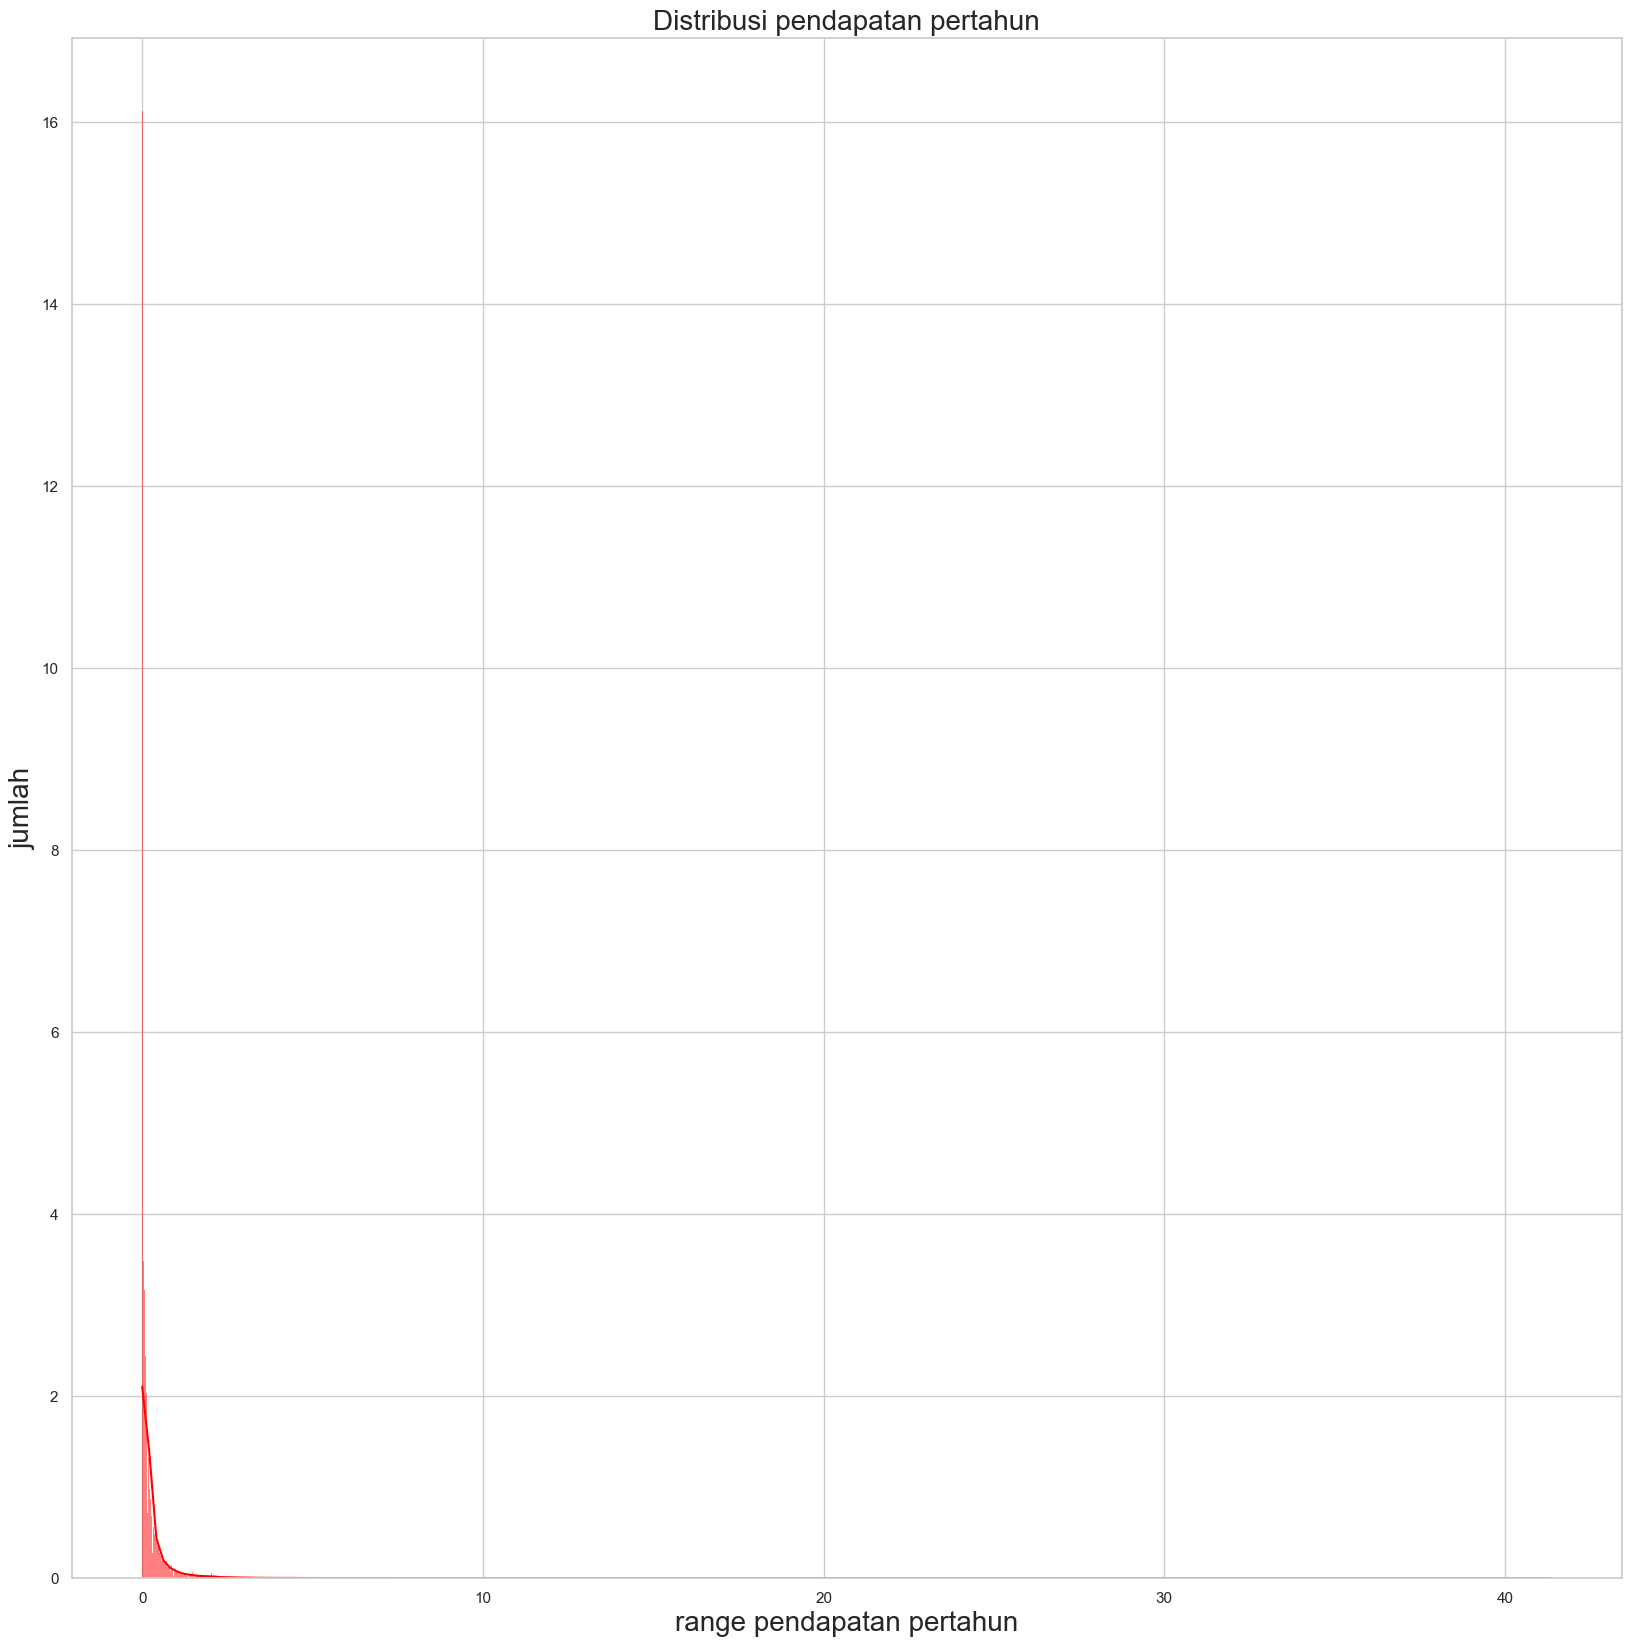

In [142]:
# cek distribusi kolom NA_Sales
plt.figure(figsize=(20,20))
sns.set(style= 'whitegrid')
sns.histplot(dataset['NA_Sales'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pendapatan pertahun',fontsize=20)
plt.ylabel('jumlah' ,fontsize=20)
plt.xlabel('range pendapatan pertahun' ,fontsize=20)

Text(0.5, 0, 'range pendapatan pertahun')

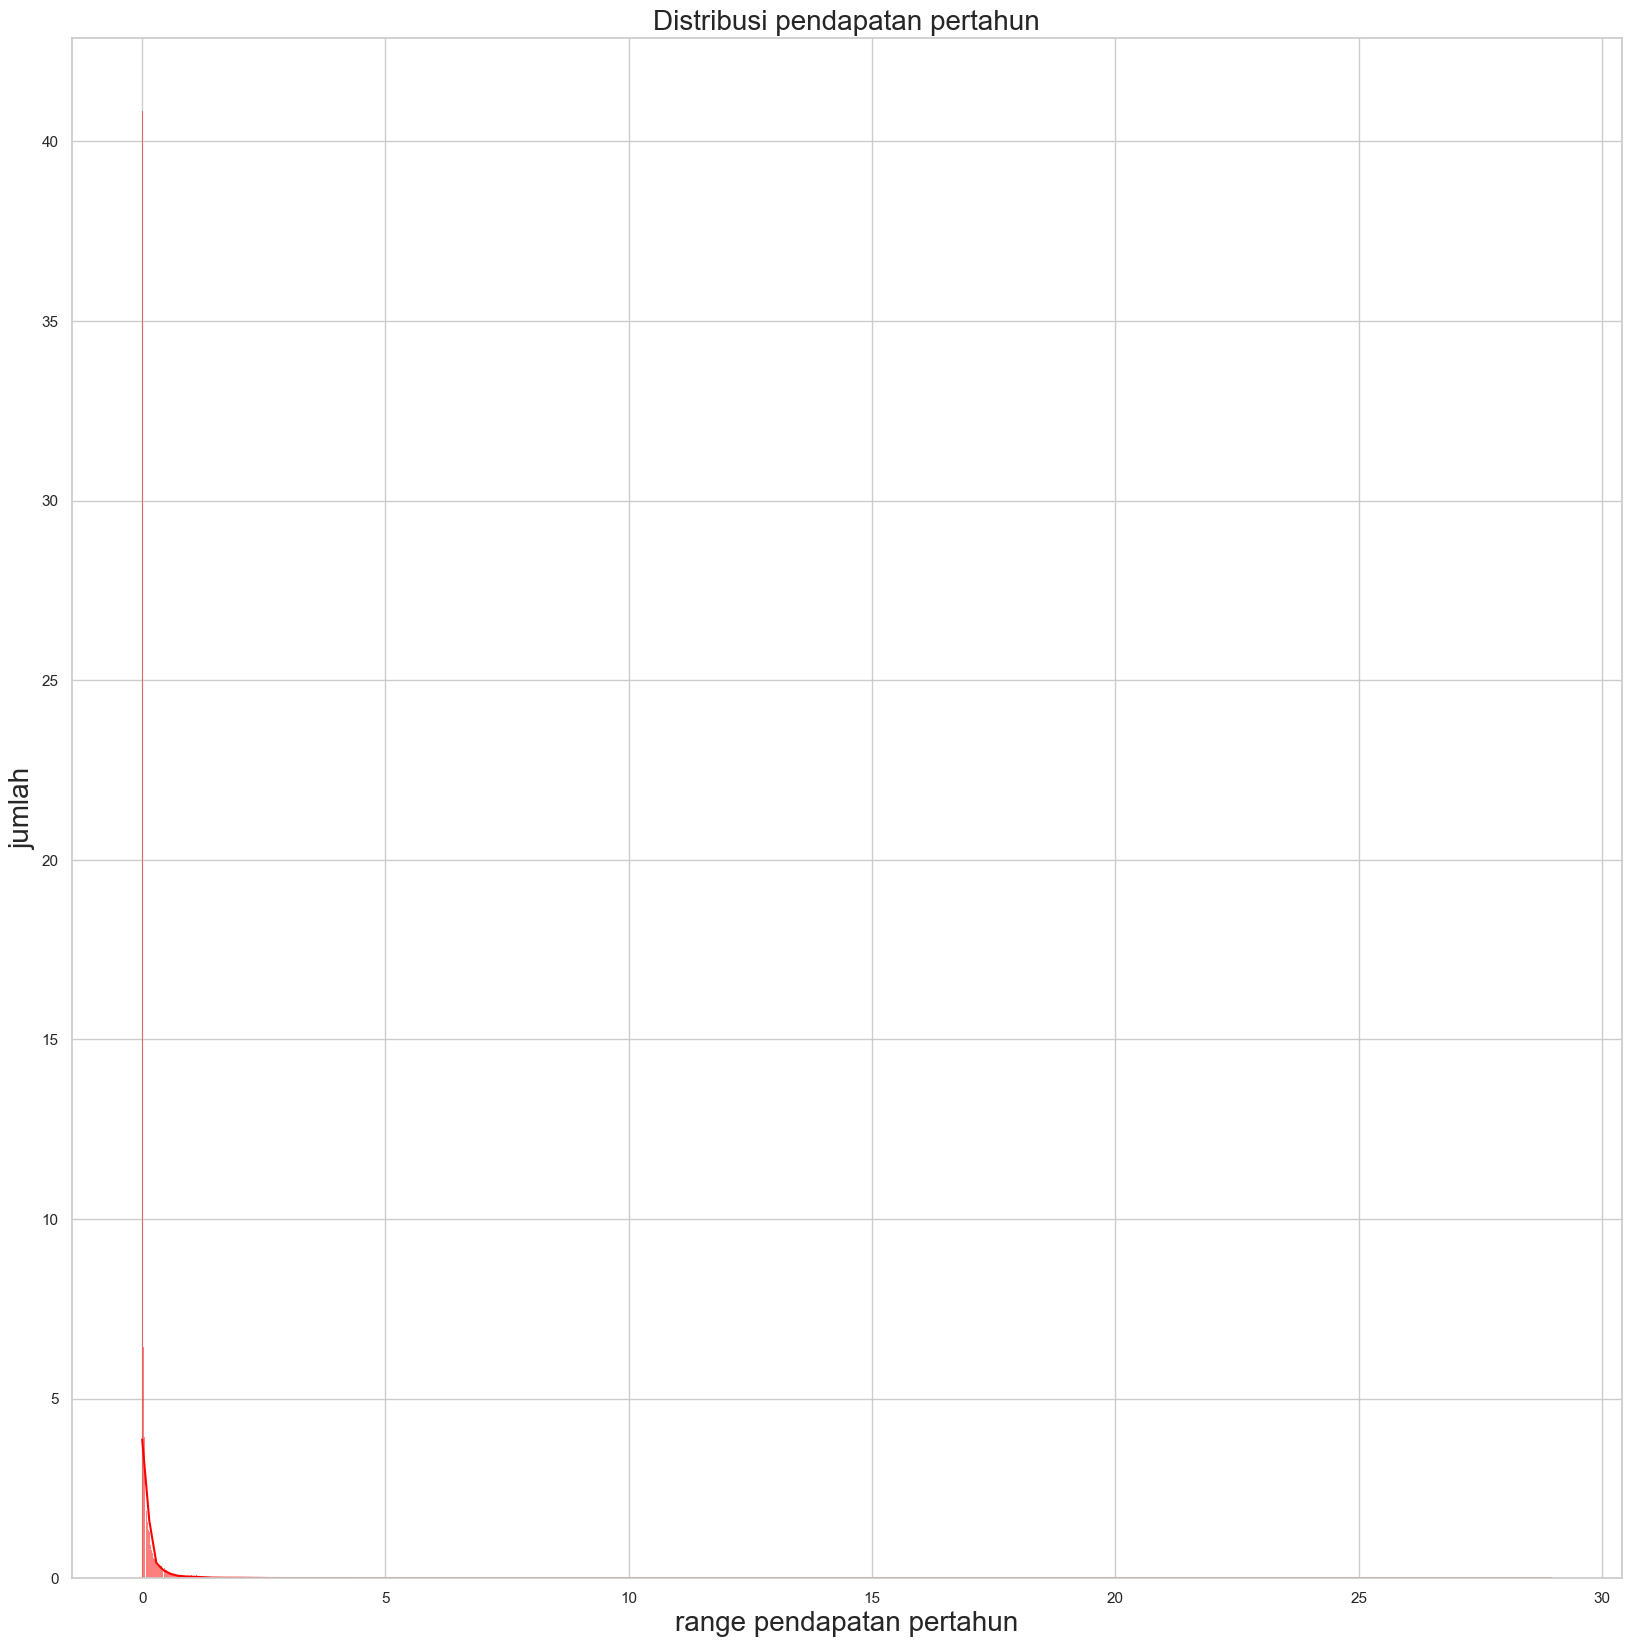

In [143]:
# cek distribusi kolom EU_Sales
plt.figure(figsize=(20,20))
sns.set(style= 'whitegrid')
sns.histplot(dataset['EU_Sales'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pendapatan pertahun',fontsize=20)
plt.ylabel('jumlah' ,fontsize=20)
plt.xlabel('range pendapatan pertahun' ,fontsize=20)

Text(0.5, 0, 'range pendapatan pertahun')

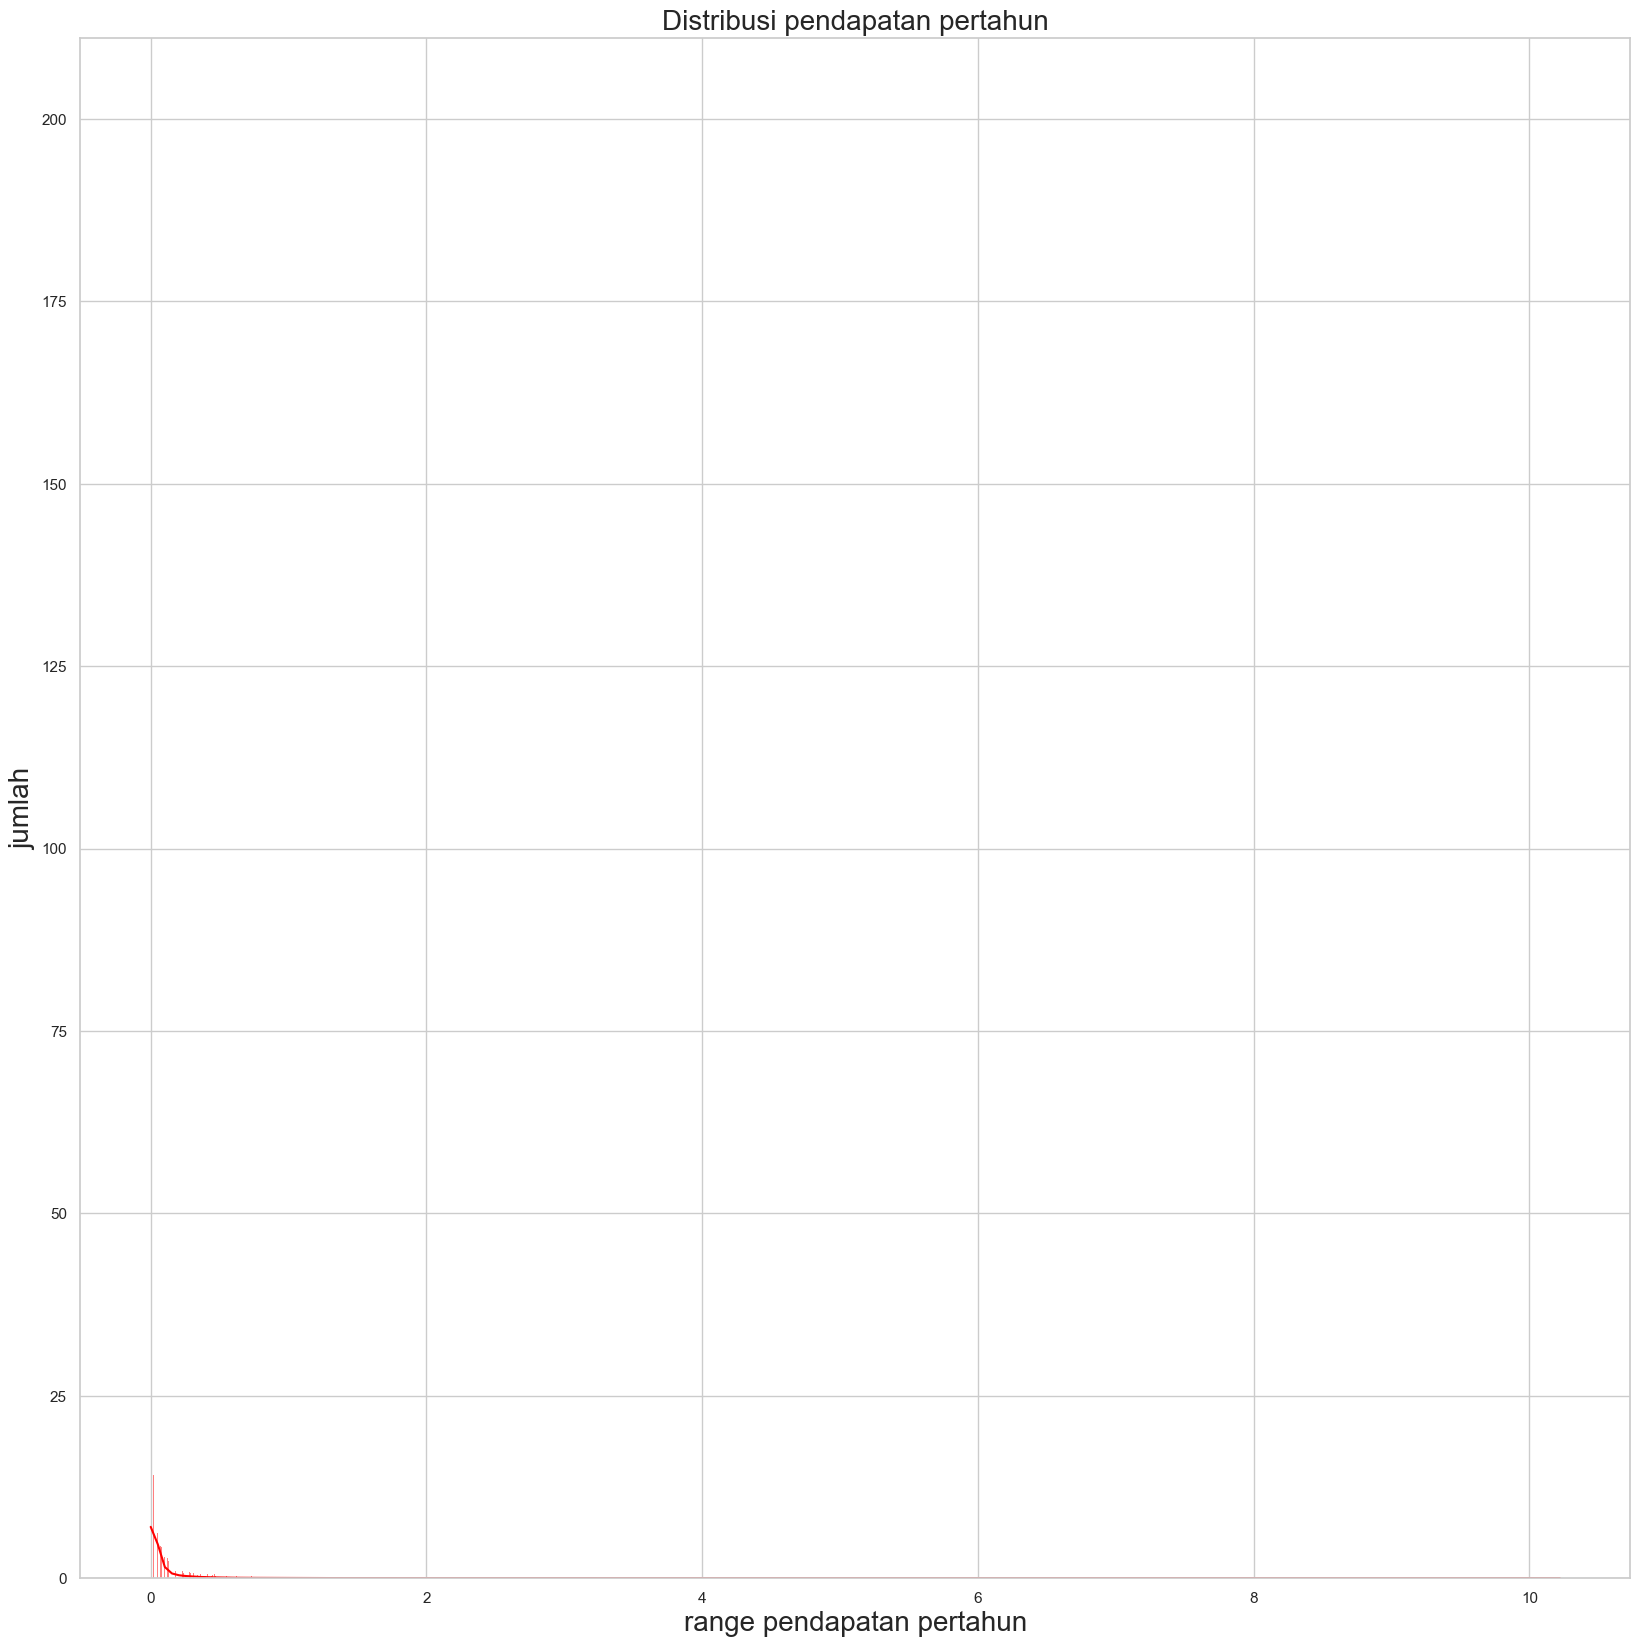

In [144]:
# cek distribusi kolom JP_Sales
plt.figure(figsize=(20,20))
sns.set(style= 'whitegrid')
sns.histplot(dataset['JP_Sales'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pendapatan pertahun',fontsize=20)
plt.ylabel('jumlah' ,fontsize=20)
plt.xlabel('range pendapatan pertahun' ,fontsize=20)

Text(0.5, 0, 'range pendapatan pertahun')

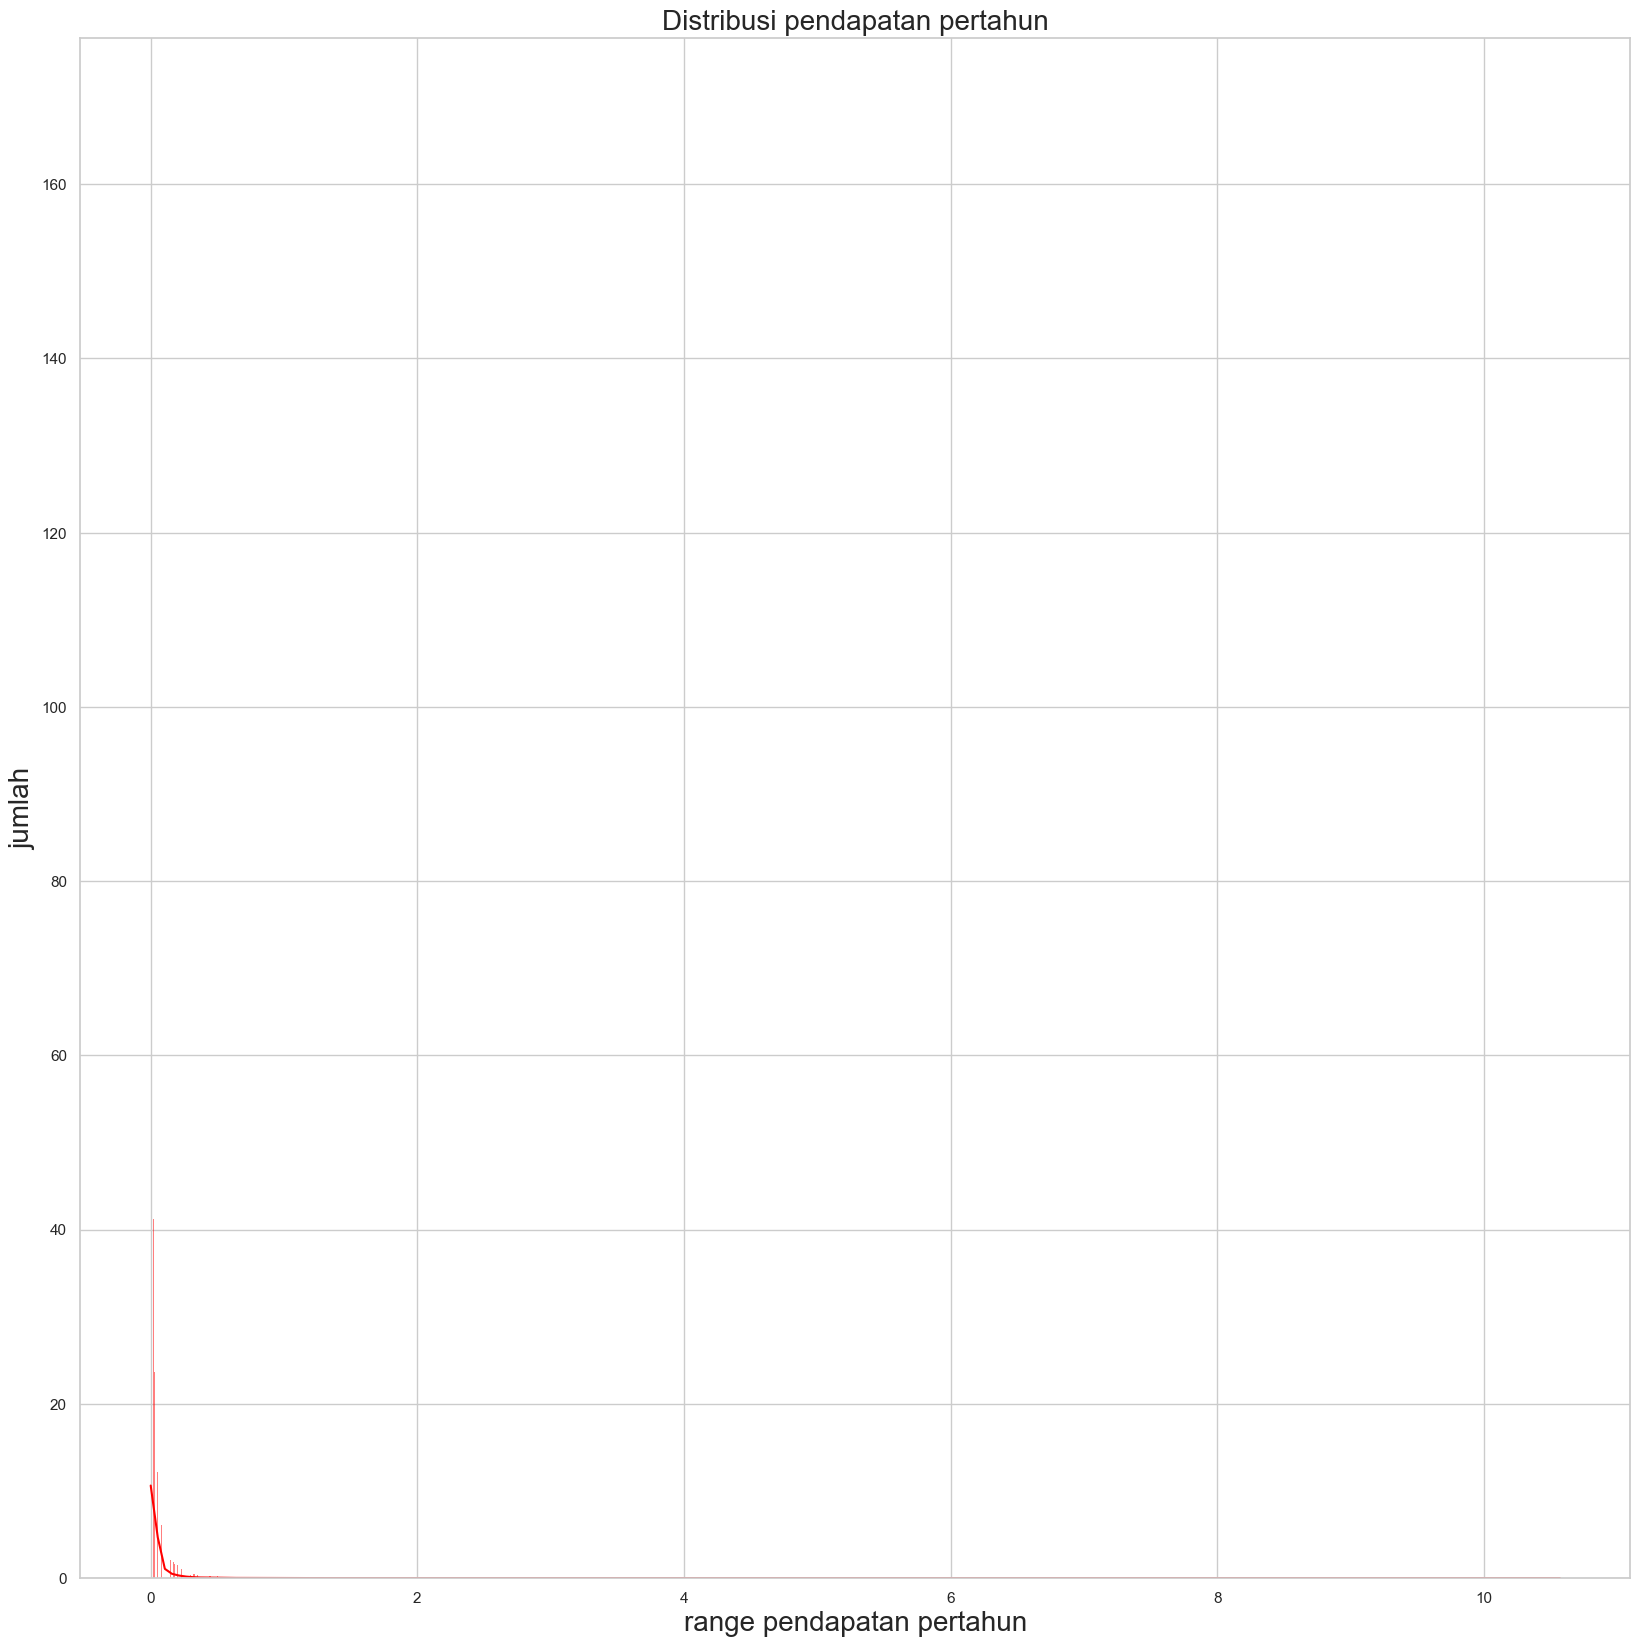

In [145]:
# cek distribusi kolom Other_Sales
plt.figure(figsize=(20,20))
sns.set(style= 'whitegrid')
sns.histplot(dataset['Other_Sales'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pendapatan pertahun',fontsize=20)
plt.ylabel('jumlah' ,fontsize=20)
plt.xlabel('range pendapatan pertahun' ,fontsize=20)

Text(0.5, 0, 'range pendapatan pertahun')

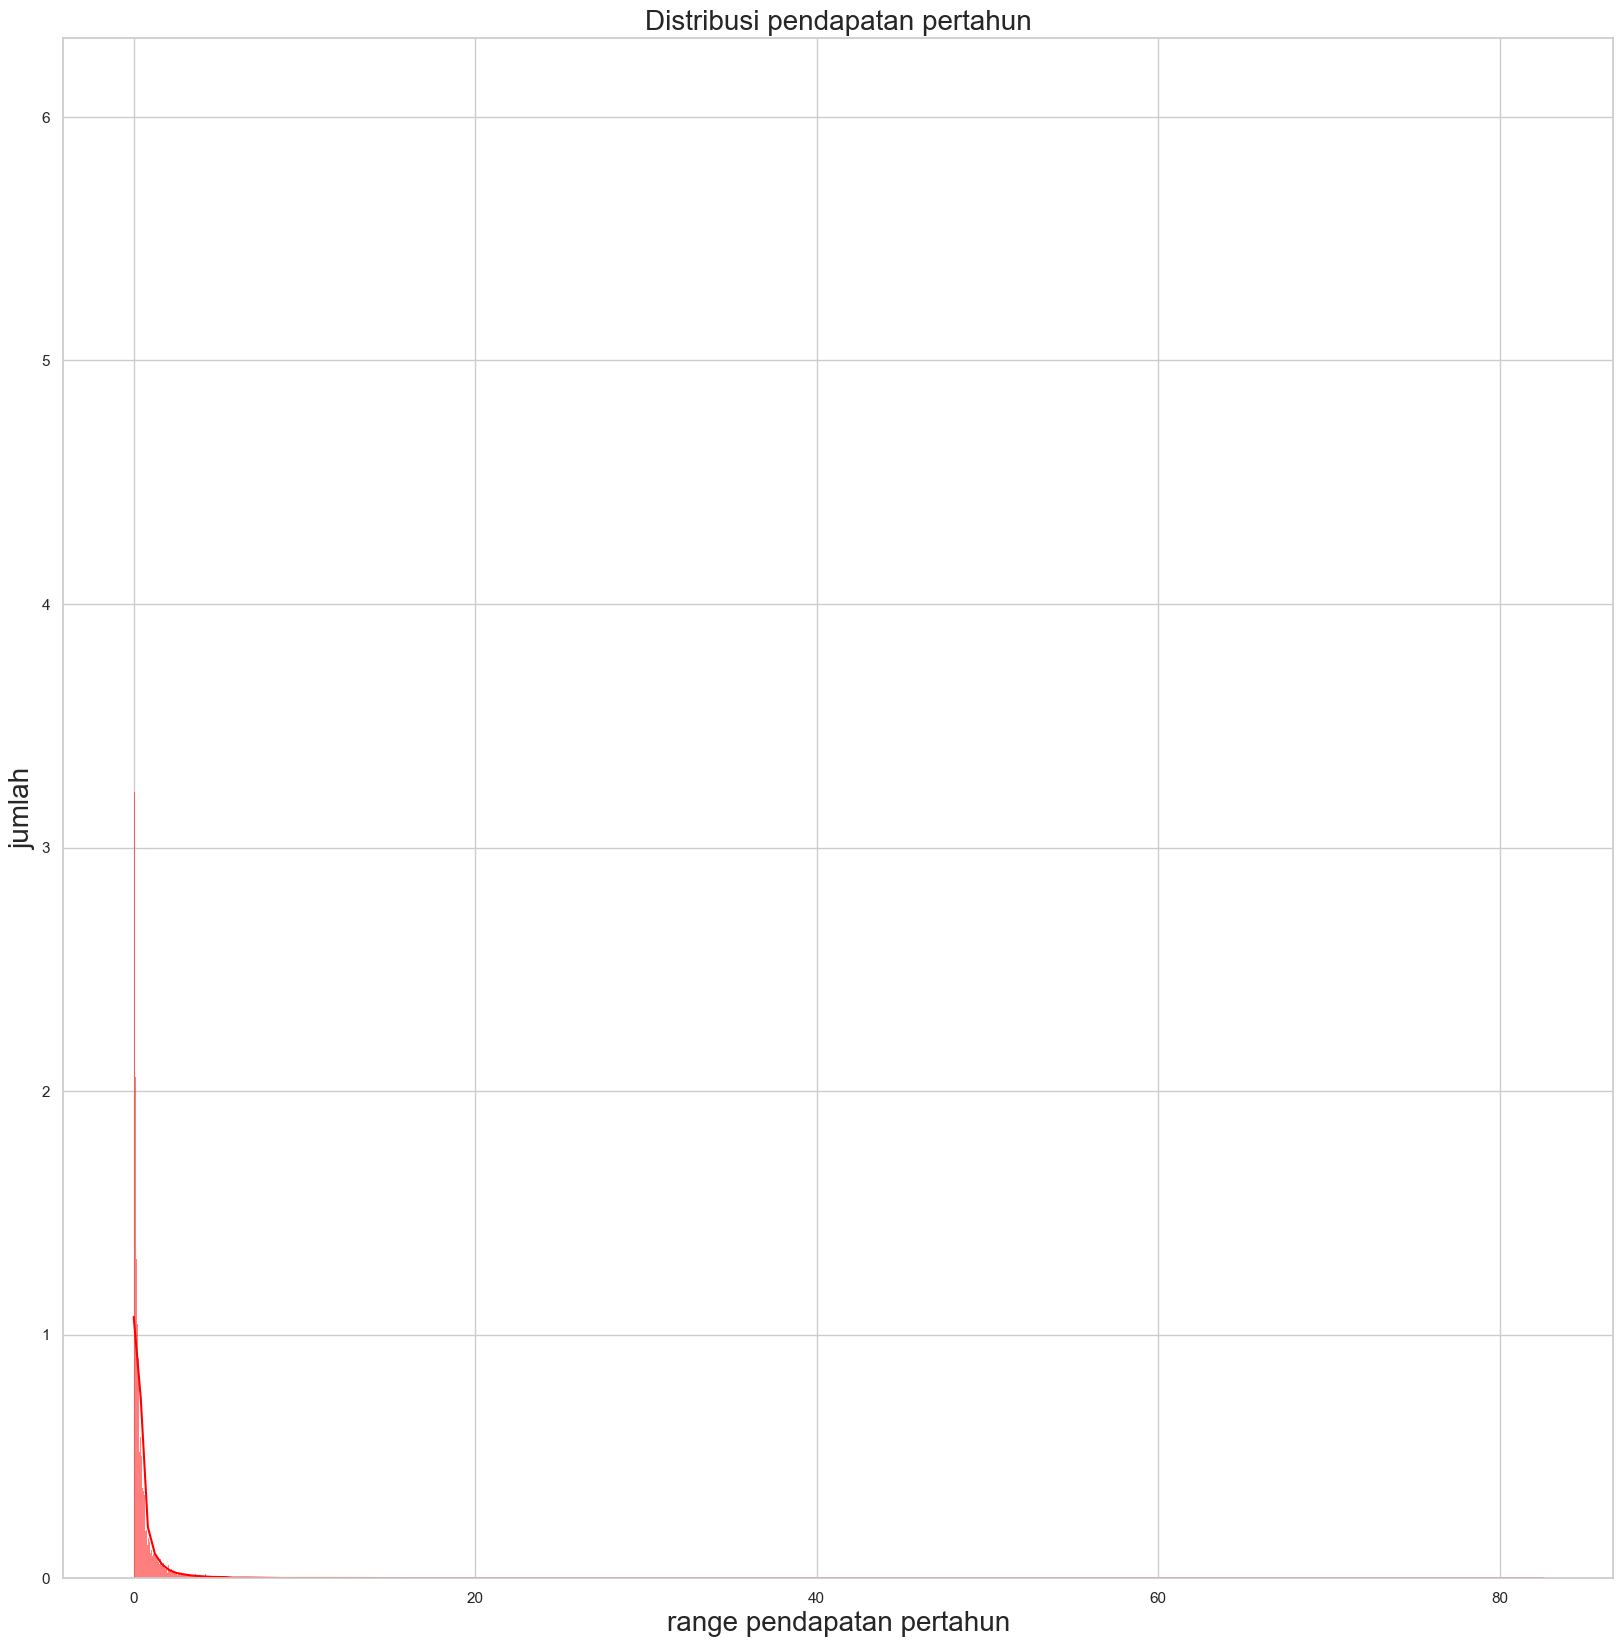

In [146]:
# cek distribusi kolom Global_Sales
plt.figure(figsize=(20,20))
sns.set(style= 'whitegrid')
sns.histplot(dataset['Global_Sales'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pendapatan pertahun',fontsize=20)
plt.ylabel('jumlah' ,fontsize=20)
plt.xlabel('range pendapatan pertahun' ,fontsize=20)

## cek distribusi kolom spending score

Text(0.5, 0, 'range pegeluaran')

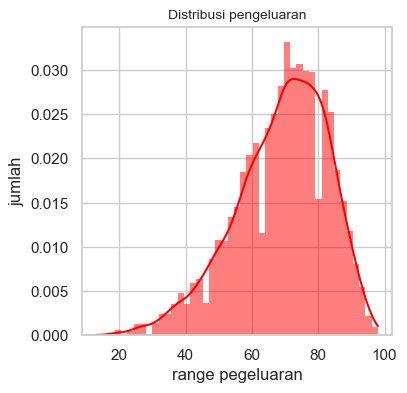

In [147]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(dataset['Critic_Score'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pengeluaran',fontsize=10)
plt.ylabel('jumlah')
plt.xlabel('range pegeluaran')

Text(0.5, 0, 'range pegeluaran')

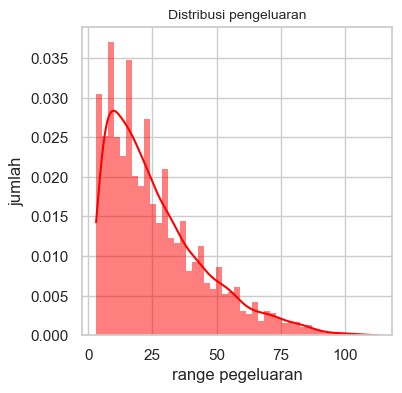

In [148]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(dataset['Critic_Count'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pengeluaran',fontsize=10)
plt.ylabel('jumlah')
plt.xlabel('range pegeluaran')

Text(0.5, 0, 'range pegeluaran')

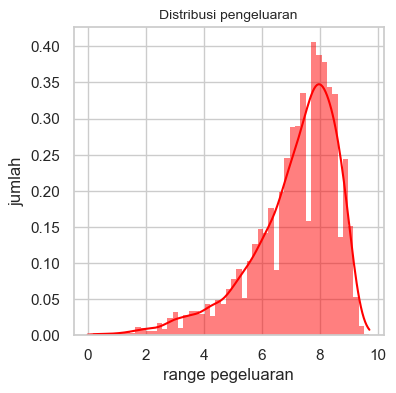

In [149]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(dataset['User_Score'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pengeluaran',fontsize=10)
plt.ylabel('jumlah')
plt.xlabel('range pegeluaran')

Text(0.5, 0, 'range pegeluaran')

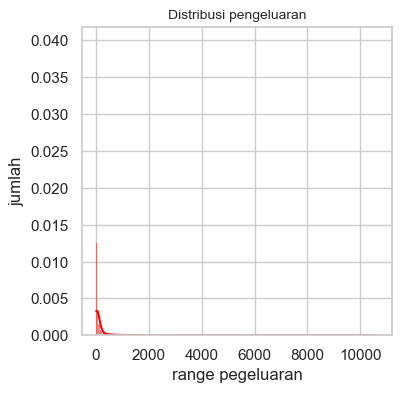

In [150]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(dataset['User_Count'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pengeluaran',fontsize=10)
plt.ylabel('jumlah')
plt.xlabel('range pegeluaran')

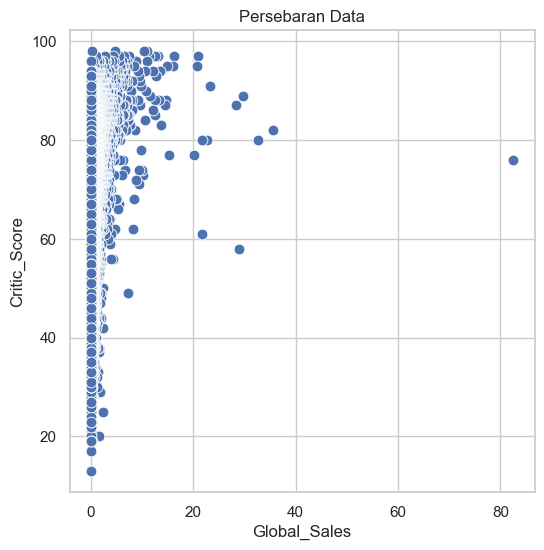

In [151]:
#persebaran data
plt.figure(figsize=(6,6))
sns.scatterplot(x='Global_Sales', y='Critic_Score', data = dataset, s = 60)
plt.title('Persebaran Data')
plt.show()

In [152]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.dropna(inplace=True)  # atau ganti NaN dengan nilai rata-rata atau median

In [153]:
dataset = dataset.astype(float)

In [154]:
# hitung within cluster sum of squared error (wcss) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmModel = KMeans( n_clusters=i, n_init=10)
    kmModel.fit(dataset)
    wcss.append(kmModel.inertia_)

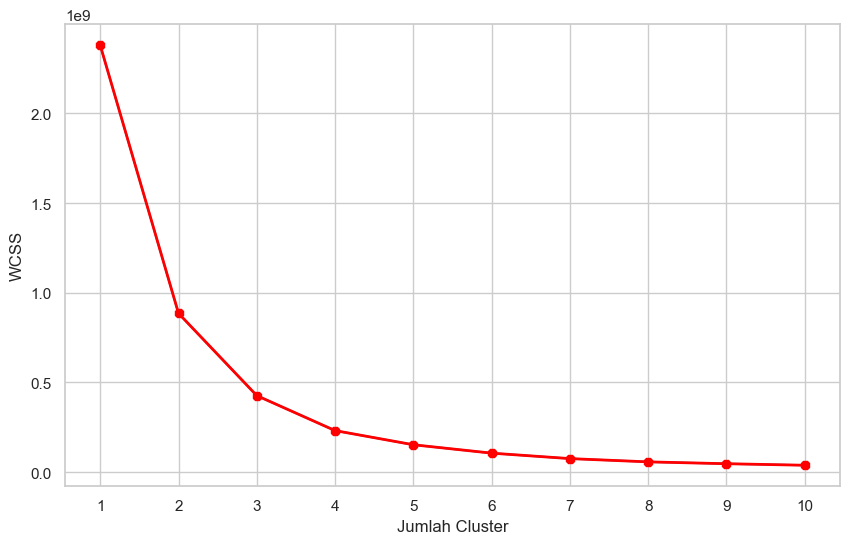

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [156]:
# model dengan 5 cluster
kmModelFix = KMeans(n_clusters=5)
kmModelFix.fit(dataset)

#memprediksi label 
hasil_prediksi = kmModelFix.predict(dataset)
print(hasil_prediksi)

[2 0 2 ... 2 2 2]


In [157]:
dataset['label']= hasil_prediksi
dataset.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count  User_Score  User_Count  label  
0          51.0         8.0       322.0      2  
2          73.0         8.3       709.0      0  
3          73.0         8.0       192.0      2  
6          65.0         8.5       431.0      0  
7          41.0         6.6       129.0      2

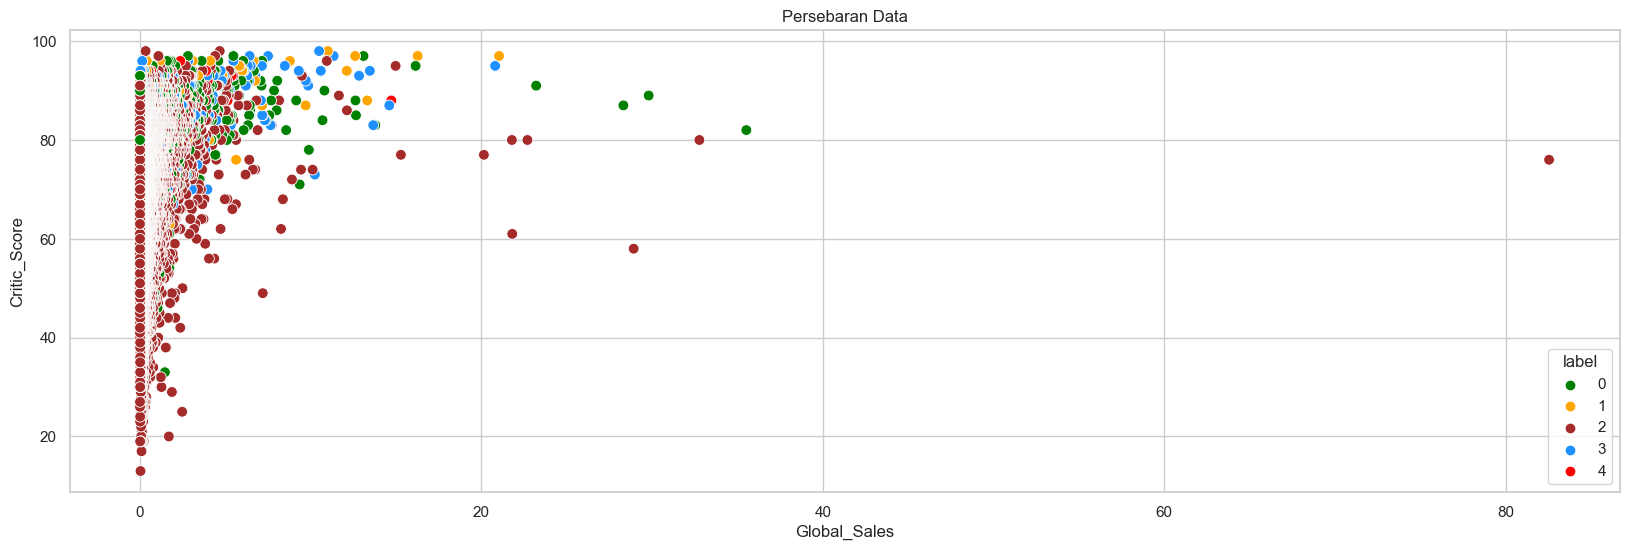

In [158]:
#persebaran data beserta labelnya
plt.figure(figsize=(20,6))
sns.scatterplot(x='Global_Sales', y='Critic_Score', hue='label',
               palette=['green', 'orange', 'brown', 'dodgerblue', 'red'], legend='full',
               data = dataset, s = 60)
plt.title('Persebaran Data')
plt.show()

## IMPLEMENTASI K-MEANS

In [165]:
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.60)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [166]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

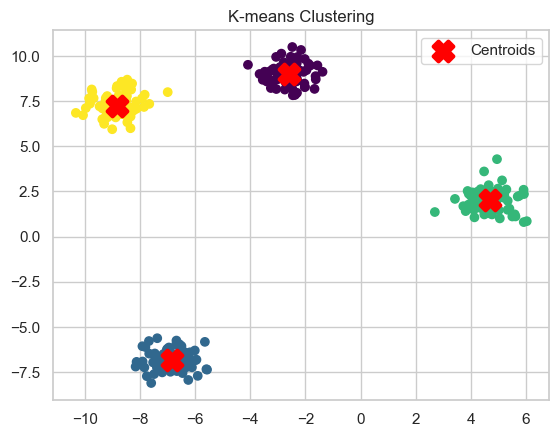

In [164]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='red', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()